In [29]:

%matplotlib inline

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math
import random
from matplotlib import collections as matcoll
import seaborn as sns
from scipy.optimize import curve_fit
from sklearn.linear_model import LinearRegression

In [16]:
#Read Data into dataframe
gaugeData = pd.read_table('gauge-1wb1wa6-2gpel41.txt',delim_whitespace=True)

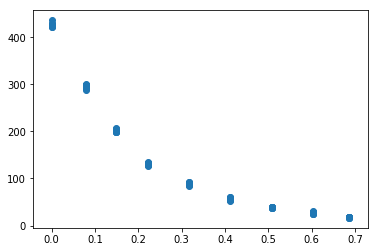

In [17]:
plt.scatter(gaugeData['density'],gaugeData['gain'])

In [18]:
#Log Transformation 
gaugeData2 = gaugeData.copy(deep = True)
gaugeData2['gain'] = gaugeData2['gain'].apply(lambda x: np.log10(x))

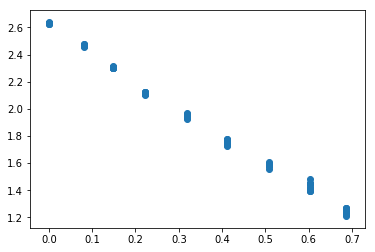

In [22]:
plt.scatter(gaugeData2['density'],gaugeData2['gain'])

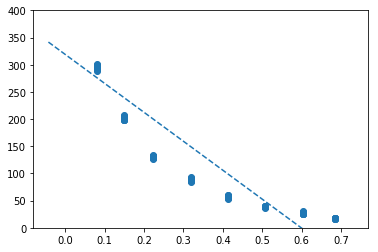

In [6]:
#Data plotted with least squares line
def line(x, m, b):
    return m*x + b
M,B = curve_fit(line, gaugeData['density'], gaugeData['gain'])[0]
def abline(slope, intercept):
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')
plt.scatter(gaugeData['density'],gaugeData['gain'])
plt.ylim(0,400)
abline(M,B)

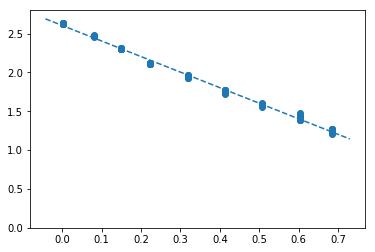

In [24]:
#Data plotted with least squares line
def line(x, m, b):
    return m*x + b
M2,B2 = curve_fit(line, gaugeData2['density'], gaugeData2['gain'])[0]
def abline(slope, intercept):
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')
plt.scatter(gaugeData2['density'],gaugeData2['gain'])
plt.ylim(0,2.8)
abline(M2,B2)

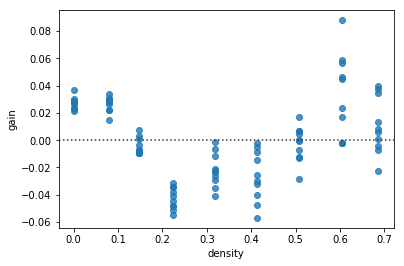

In [25]:
#log transformed residuals 
sns.residplot(gaugeData2['density'],gaugeData2['gain'])

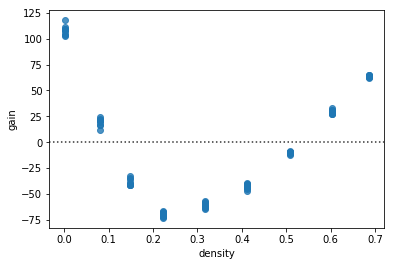

In [26]:
#Original Data Residuals
sns.residplot(gaugeData['density'],gaugeData['gain'])

In [28]:
np.correlate(gaugeData['density'],gaugeData['gain'])

array([ 48.76410068])

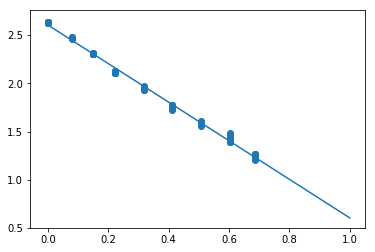

In [37]:
#Different Model:
model2 = LinearRegression(fit_intercept=True)

model2.fit(gaugeData2['density'][:, np.newaxis], gaugeData2['gain'])

xfit = np.linspace(0, 1, 10)
yfit = model2.predict(xfit[:, np.newaxis])

plt.scatter(gaugeData2['density'], gaugeData2['gain'])
plt.plot(xfit, yfit);